In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
import matplotlib.pyplot as plt

In [35]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10,20)
        self.fc2 = nn.Linear(20,1)

    def forward(self ,x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

In [36]:
model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7)

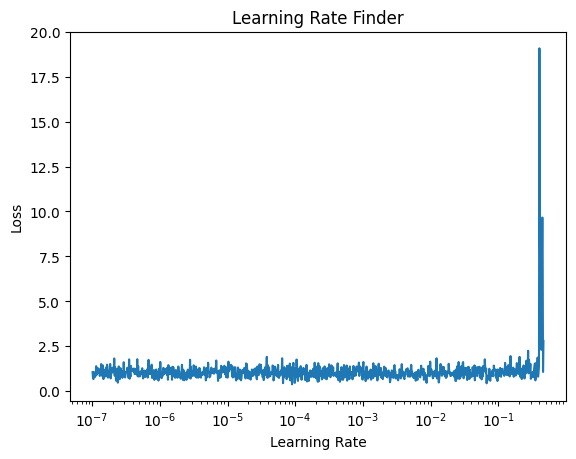

8.981178609606941e-05 0.3709093928337097


In [37]:
def lr_lambda(i) :
    return 10 ** (i / 150)  # Increases LR exponentially, adjusted divisor to prevent overflow

scheduler = LambdaLR(optimizer=optimizer, lr_lambda=lr_lambda)

lr, loss = [] ,[] # loss is now a list
info = []
for i in range(1000):
    optimizer.zero_grad()

    inputs = torch.randn(32, 10)
    targets = torch.randn(32, 1)

    output = model(inputs)
    current_loss = loss_fn(output, targets) # Use a new variable for the tensor loss
    current_loss.backward()
    optimizer.step()
    scheduler.step()



    lr.append(optimizer.param_groups[0]['lr'])
    loss.append(current_loss.item()) # Append the item from current_loss to the 'loss' list
    info.append({optimizer.param_groups[0]['lr'] : current_loss.item()})

plt.plot(lr, loss)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Finder")
plt.show()

min_lr , min_loss = 0 ,100000000000

for a in info:
    if list(a.values())[0] < min_loss:
        min_loss = list(a.values())[0]
        min_lr = list(a.keys())[0]

print(min_lr , min_loss)